# Titanic Analysis With NumPy And Pandas

The aim of this project is using Numpy and Pandas to analyse a data set containing information on the Titanic and then communicating findings as well as I can using only Python and it's libraries NumPy and Pandas with and Matplotlib.

# Data Description

This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).

survival: Survival (0 = No; 1 = Yes)
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name
sex: Sex
age: Age
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare
cabin: Cabin
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
Special Notes:

Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5
With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.

Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent: Mother or Father of Passenger Aboard Titanic
Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

# Importing The DataSet 

In [1]:
##Importing the csv file from location on storage into a pandas data frame

import numpy as np
import pandas as pd

titanic_df = pd.read_csv('titanic_data.csv')  #Read the csv file as a pandas dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
len(titanic_df['Ticket'].unique())           ##Checking on a slice of the data in the list  
len(titanic_df) - len(titanic_df['Ticket'].unique()) 
len(titanic_df)

891

# QUESTIONS

Inspecting the data on Excel Spreadsheets, I have come up with quite a few intriguing questions I propose to answer.

These questions are:

1) I'm interested in seeing how survival varied by age. 
   - I am also interested in calculating these totals by categories. Did Women, Children, Men and The Elderly have a greater chance of surviving?
   - b) Did Age in general affect survivability? And how, if so?

     
2) Exploring the Relationships between factors that might affect survivability:

   - Sex and survivability. How did the female fare sex compared to males. 
   - Ticket Class and survivability     (Ticket class is divided into 1st, 2nd and 3rd Class)
   - Passenger Fare and survivability   
   - Port of Embarkation and survivability  (Ports of Embarkation are C = Cherbourg, Q = Queenstown, S = Southampton)
     
3) Also searching through these possible relationships might be interesting:
      
   - Fare and Ticket Class and survivability on size
   - Attempting investigating data for Families on the titanic.
   - Age, Ticket Fare and no of siblings reported

4) What price of ticket determines what class one is put into. If class affected survivability, could we therefore say that ones fate was sealed as soon as one paid for tickets?

# CLEANING THE DATA

In [3]:
print (titanic_df['PassengerId'].count())

titanic_df.isnull().sum() ##Checks the dataframe fields for empty data points and sums up the number by field

891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the results:
177 passengers are missing age information, 687 passengers are missing Cabin data and 2 passengers are missing Embarked Data

As age is one of the fields we propose to analyze, we have to consider a method of either clearing out the null data or replacing such. I decided to replace missing age data with the mean of the data with the suspection that perhaps the missing factors may not in fact be Randomly misssing.

Cabin data is not under investigation and so, ignoring it will have no negative effects.

For the two parts of Embarked data we will substitute with the mode.

One thing to also consider is reducing the data frame by cleaning out the columns not under investigation.

If we are to investigate data by family then we must consider how families are displayed on the data. Perhaps those with the same first name, ticket number and sibsp number. Then including a column combining this data together might work for this purpose only might be appropriate. 

In [4]:
def split_name(data):  #Splits the passengers name and returns only the first name (at index in the split list)
    return data.split(',')[0]

#titanic_first_names.rename(columns={'SibSp':'Family Key', 'Name':'Family Name'}, inplace = True)
#titanic_df = titanic_df.merge(titanic_first_names, on = 'PassengerId', how = 'left',)

##Creating a hash key for family members by combining their ticket number and family name

titanic_df['Family Name'] = titanic_df['Name'].apply(split_name)

titanic_df['Family Key'] = titanic_df['Family Name'] + titanic_df['Ticket']

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Name,Family Key
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,BraundA/5 21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,CumingsPC 17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,HeikkinenSTON/O2. 3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Futrelle113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Allen373450


In [5]:
## df.duplicated Returns the number of Entries that are not duplicated and we sum those up

print ('There are about {} people travelling together.'.format(len(titanic_df) - len(titanic_df['Ticket'].unique())))
print ('\nThere are at most {} families.'.format(titanic_df.duplicated('Family Name').sum()))
print ('\nThere are at least {} families.'.format(titanic_df.duplicated('Family Key').sum()))

There are about 210 people travelling together.

There are at most 224 families.

There are at least 152 families.


We have a maximum of 224 families because some families, individuals or both will of course share the same last name. Bringing in the family Key reduces the number to about 152

In [8]:
##Dropping unused columns in the dataframe

titanic_data = titanic_df.drop(['Name','PassengerId', 'Ticket', 'Cabin'], axis=1)

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Name,Family Key
0,0,3,male,22.0,1,0,7.2500,S,Braund,BraundA/5 21171
1,1,1,female,38.0,1,0,71.2833,C,Cumings,CumingsPC 17599
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,HeikkinenSTON/O2. 3101282
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Futrelle113803
4,0,3,male,35.0,0,0,8.0500,S,Allen,Allen373450


In [9]:
##Replacing missing age data with the mean

titanic_df['Embarked'] = titanic_df['Embarked'].replace(np.nan, titanic_df['Embarked'].mode)

# Investigating The Data and Visualization

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

## Question 1

### A) Did Women, Children and the Elderly have a better chance of survival?

To investigate this question, we split the ages into categories where:

- Children          Ages below 18
                                                            
- Middle Aged Men    Men with ages between 31 & 49
                              
- Middle Aged Women  Women with ages between 31 & 49            
                              
- Young Men         Men between ages 17 & 31
                  
- Young Women       Women between ages 17 & 31

- Elderly           Ages above 49     

In [470]:
#titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Age'] > 17) & (titanic_data['Age'] < 31)].head()

In [504]:
##Categorizing the data by age into four groups
##Elders: Older than 50, 

titanic_data_age = titanic_data.copy()

##Selects data where sex is female and age range is between 18 and 30. Adds that data to a new column 'Age Group'.
##Sets property for all rows to 'Young Women'.

titanic_data_age.loc[ \
    ((titanic_data_age['Sex'] == 'female') & (titanic_data_age['Age'] > 17) & (titanic_data_age['Age'] < 31)),\
                     'Age Group'] = 'Young Women'

titanic_data_age.loc[ \
    ((titanic_data_age['Sex'] == 'male') & (titanic_data_age['Age'] > 17) & (titanic_data_age['Age'] < 35)),\
                             'Age Group'] = 'Young Men'

titanic_data_age.loc[ \
    ((titanic_data_age['Sex'] == 'male') & (titanic_data_age['Age'] >= 35) & (titanic_data_age['Age'] <= 49)),\
                             'Age Group'] = 'Middle Age Men'

titanic_data_age.loc[ \
    ((titanic_data_age['Sex'] == 'female') & (titanic_data_age['Age'] >= 31 ) & (titanic_data_age['Age'] <= 49)),\
                     'Age Group'] = 'Middle Age Women'

titanic_data_age.loc[(titanic_data_age['Age'] < 18),'Age Group'] = 'Children'

titanic_data_age.loc[(titanic_data_age['Age'] > 49),'Age Group'] = 'Elderly'

In [598]:
groups = titanic_data_age.dropna().groupby(['Age Group', 'Survived']).size()

#round(((groups['Children'] / len(titanic_data_age['Age Group']=='Children'))*100),3)
#print(groups[titles[0]])
#print(groups[titles[0]],':', len(titanic_data[titanic_data_age['Age Group']=='Young Men']))
i=0
print(groups['Children',0],
groups['Children'].sum(),
groups['Children',1])

groups[titles[i],1]

52 113 61


41

Age Group         Survived
Children          0            52
                  1            61
Elderly           0            47
                  1            26
Middle Age Men    0            80
                  1            22
Middle Age Women  0            17
                  1            62
Young Men         0           200
                  1            41
Young Women       0            28
                  1            76
dtype: int64


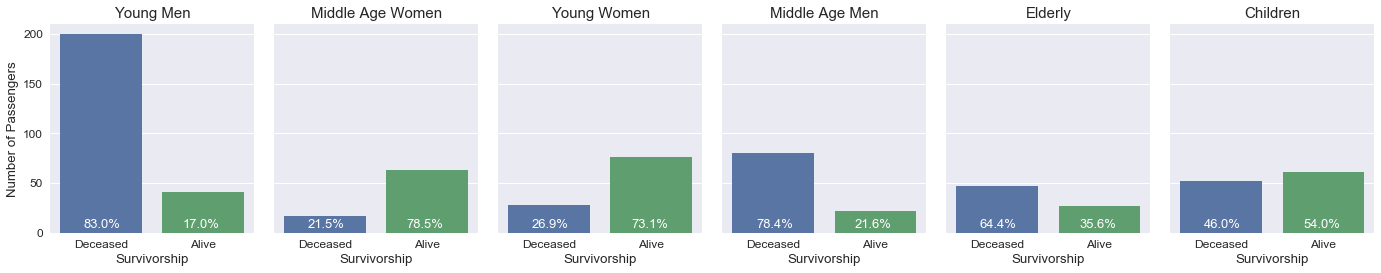

In [629]:
# Grouping the values as by Age Group and Survival
groups = titanic_data_age.dropna().groupby(['Age Group','Survived']).size()
print (groups)

sns.set(style='darkgrid',font='sans-serif',font_scale=1.2)

          # Graph to compare survival count between Age Groups
graph = sns.factorplot('Survived', col='Age Group', data=titanic_data_age, kind='count', size=4, aspect=.8)


graph.set_axis_labels('Survivorship', 'Number of Passengers') # Setting the labels for the plot
graph.set_xticklabels(['Deceased', 'Alive'])

        #We set the title for each plot according to the listed titles 
titles = ['Young Men','Middle Age Women','Young Women','Middle Age Men','Elderly','Children']
                 #tit=list(titanic_data_age['Age Group'].unique())


for i,ax in enumerate(graph.axes.flat):
    ax.set_title(titles[i], fontdict = {'fontsize': 15})
    percentage_survival = round((  (groups[titles[i],1] / groups[titles[i]].sum() )*100) ,1) #calclating the % survival by group
    percentage_deceased = round((  (groups[titles[i],0] / groups[titles[i]].sum() )*100) ,1)#calclating the % deceased by group
    ax.text(0.8, 5, str(percentage_survival)+'%',   color='white', fontdict = {'fontsize': 13})
    ax.text(-0.17, 5, str(percentage_deceased)+'%',   color='white', fontdict = {'fontsize': 13})    

### NOTES:

It seems that Women and Children generally seem to have a higher survivability rate with 'Middle Age Women' and 'Young Women' on top with survival rates in the 70's. Men and generally people above 50 seemed to fare badly.

It might be interesting to investigate data on children in particular to see exactly what age range survives better.

### b) Did Age in general affect survivability? And how if so?

We can look at this by considering:
- The age distribution of survivors compared to non-survivors as well as the overall data.
- Compare survivor age data to non-survivor

Passengers with Age data:  714
Mean Age:  29.69911764705882
Youngest Passenger:  29.69911764705882
Oldest Passenger:  80.0
Most Recurent Ages:  0    24.0
dtype: float64


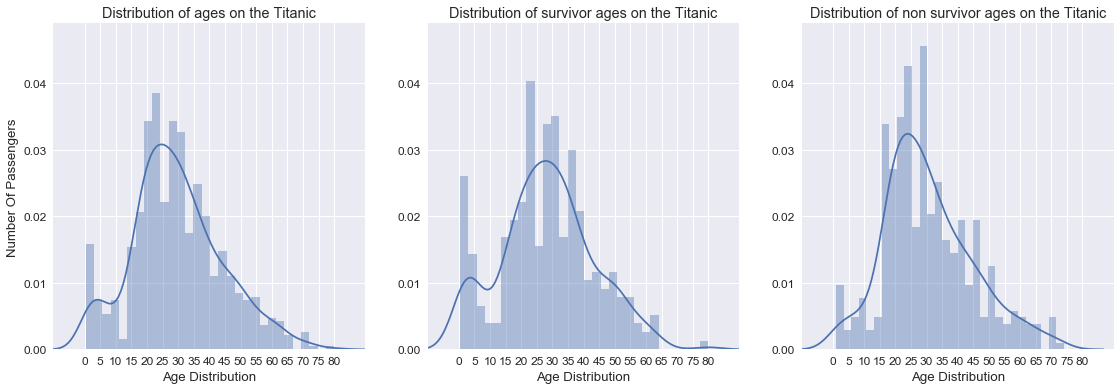

In [630]:
##TAKING THE AGES FROM THE TITANIC DATA BY AGE AND PLOTTING A HISTOGRAM

survivor_ages = titanic_data_age[['Age', 'Survived']].copy()
survivor_ages = survivor_ages[survivor_ages['Survived']==1]

non_survivor_ages = titanic_data_age[['Age', 'Survived']].copy()
non_survivor_ages = non_survivor_ages[non_survivor_ages['Survived']==0]

sns.set(style='darkgrid',font='sans-serif',font_scale=1.2)

fig,axes = plt.subplots(figsize=(19,6),nrows=1,ncols=3)

ax1 = sns.distplot(titanic_data_age['Age'].dropna(), bins=30, ax=axes[0], kde=True)

ax2 = sns.distplot(survivor_ages['Age'].dropna(), bins=30, ax=axes[1])

ax3 = sns.distplot(non_survivor_ages['Age'].dropna(), bins=30, ax=axes[2])

labels = ['Distribution of ages on the Titanic','Distribution of survivor ages on the Titanic',\
          'Distribution of non survivor ages on the Titanic']

for i, ax in enumerate([ax1,ax2,ax3]):
    ax.set_ylim(0,0.049)
    ax.set_xlim(-10,90)
    ax.set_xticks(range(0,85,5))
    ax.set_xlabel('Age Distribution')
    ax1.set_ylabel('Number Of Passengers') 
    ax.set_title(labels[i])

age_data = titanic_data_age['Age'].dropna()


print('Passengers with Age data: ',len(age_data))
print('Mean Age: ',age_data.mean())
print('Youngest Passenger: ',age_data.mean())
print('Oldest Passenger: ',age_data.max())
print('Most Recurent Ages: ',age_data.mode())

In [631]:
non_surv_age = non_survivor_ages['Age'].dropna()
surv_age = survivor_ages['Age'].dropna()

print('                                        ¦            ')
print('Survivors                               ¦ Non-Survivors')
print('                                        ¦            ')
print('Total Survivors with Age data: ',len(surv_age),'    ¦ Total Non-Survivors with Age data: ',len(non_surv_age))
print('Mean Age: ',surv_age.mean(),             '          ¦ Mean Age: ',non_surv_age.mean())
print('Youngest Survivor: ',surv_age.min(),'               ¦ Youngest Non-Survivor: ',non_surv_age.min())
print('Oldest Survivor: ',surv_age.max(),'                 ¦ Oldest Non-Survivor: ',non_surv_age.max());
print('Most Common Survivors Ages: ',non_surv_age.mode(), '\
                         ¦ Most Common Non-Survivors Ages: ',(surv_age.mode()));
print('                                        ¦            ')
print('                                        ¦            ')

                                        ¦            
Survivors                               ¦ Non-Survivors
                                        ¦            
Total Survivors with Age data:  290     ¦ Total Non-Survivors with Age data:  424
Mean Age:  28.343689655172415           ¦ Mean Age:  30.62617924528302
Youngest Survivor:  0.42                ¦ Youngest Non-Survivor:  1.0
Oldest Survivor:  80.0                  ¦ Oldest Non-Survivor:  74.0
Most Common Survivors Ages:  0    21.0
dtype: float64                          ¦ Most Common Non-Survivors Ages:  0    24.0
dtype: float64
                                        ¦            
                                        ¦            


### NOTES

About 290 people survived the sinking of the titanic with 424 people dead.

- The ages of survivors on the Titanic seems to be relatively younger.

- The largest number of survivors seemed to be between ages 20 and 25.


For non-survivors however:
- The largest number of non-survivors (is between ages between 28 and 30) seemed to peak on the side of early twenties while survivors peaked on the other side. 

- Of particular note is infant mortality and that of the elderly with about a third of infants(0-1) being saved, same as those of adults. 

Of note is the survival of children between ages 0 - 5 which is particularly high from what we can see.

While the above has given some interesting insights into age data, it has yet to fully answer our question. Perhaps we then we would look at all ages and compare the survivors. We should get pretty much the same data but without bins.

In [632]:
def conv_to_int(age):
    if age>= 0:
        return int(age)
    elif age =='NaN' or age==None:
        return age
    elif age<0:
        return (age)

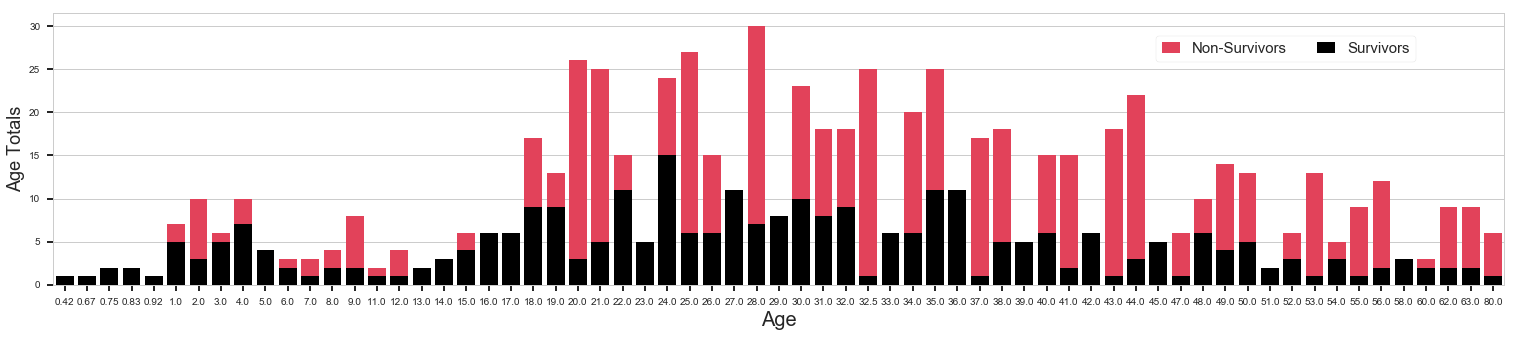

In [633]:
sns.set(style='whitegrid')
import matplotlib.ticker as ticker

#titanic_data_age['Age'] = titanic_data_age['Age'].apply(conv_to_int)
#survivor_ages['Age'] = survivor_ages['Age'].apply(conv_to_int)

fig,axes = plt.subplots(figsize=(26,5),nrows=1,ncols=1)

ax1 = sns.countplot(x="Age",data=titanic_data_age.dropna(), ax= axes, color='#FC2847', label='Non-Survivors')
ax2 = sns.countplot(x='Age',data=survivor_ages.dropna(), ax=axes, color='black', label='Survivors')

ax1.set_xlabel('Age', fontsize=20)
ax1.set_ylabel('Age Totals', fontsize=18)
ax1.tick_params(direction='out', length=6, width=2)
 
plt.legend(fontsize = 15, loc=(0.76,0.82),ncol=2, frameon=True, handlelength=1.2);
plt.savefig('Age Totals.png', dpi=400)

2) Exploring the Relationships between factors that might affect survivability:
   - Sex and survivability.  
   - Ticket Class and survivability     (Ticket class is divided into 1st, 2nd and 3rd Class)
   - Passenger Fare and survivability   
   - Port of Embarkation and survivability  (Ports of Embarkation are C = Cherbourg, Q = Queenstown, S = Southampton)
     
3) Also searching through these possible relationships might be interesting:
      
   - Fare and Ticket Class and survivability on size
   - Attempting investigating data for Families on the titanic.
   - Age, Ticket Fare and no of siblings reported

4) What price of ticket determines what class one is put into. If class affected survivability, could we therefore say that ones fate was sealed as soon as one paid for tickets?

## Question 2

##### Sex and Survivability: How did the female fare sex compared to males?

In [634]:
female = titanic_data[titanic_data['Sex']=='female']
male = titanic_data[titanic_data['Sex']=='male']

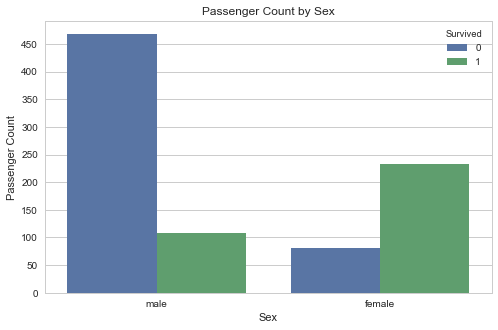

In [636]:
sns.set(style='whitegrid')

fig,axes = plt.subplots(nrows=1, ncols=1,figsize=(8,5))

a0 = sns.countplot(x="Sex", hue="Survived", ax=axes, data=titanic_data)
a0.set_title('Passenger Count by Sex')
a0.set_ylabel('Passenger Count')
a0.set_yticks(range(0,500,50));

## Question 3

##### Fare and Survivability

In [533]:
#class_and_sex = titanic_data.groupby(['Pclass', 'Sex', 'Survived']).count().astype('float')


class_and_sex = titanic_data.groupby(['Pclass', 'Sex', 'Survived']).size().astype('float')


class_and_sex[1,'female',0]

3.0

## Question 4

##### Passenger Fare, Ports Of Embarkation and Survivability

A simple bit of visualization could solve this question. A boxplot is great because it singles out the outliers, those who might have paid extremely higher for fares and plots them.

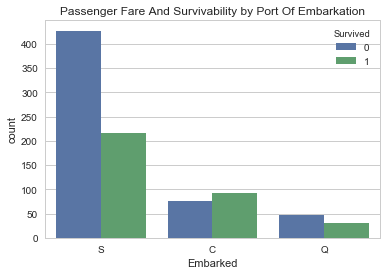

In [118]:
#nsns.boxplot(x="Embarked", y="Fare", hue="Survived",data=titanic_data, fliersize=8)
sns.countplot(x="Embarked", hue="Survived",data=titanic_data)
plt.title('Passenger Fare And Survivability by Port Of Embarkation')

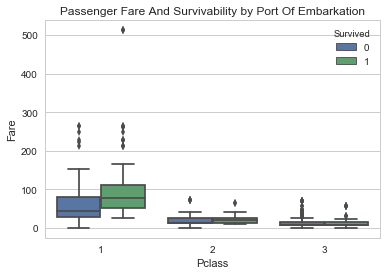

In [102]:
sns.boxplot(x="Pclass", y="Fare", hue="Survived",data=titanic_data, fliersize=5);
plt.title('Passenger Fare And Survivability by Port Of Embarkation')

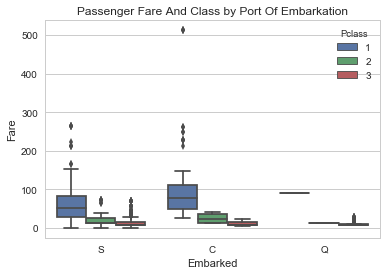

In [99]:
sns.set(style='whitegrid',font_scale=1.0)
sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=titanic_data)
plt.title('Passenger Fare And Class by Port Of Embarkation')
plt.show()

We can see that considering the data by points of Embarkation, people in First Class generally paid higher for ticket prices.

Also, we can conclude in a rather rounabout manner that if the class affected survivability and ticket price majorly determines such, then ticket price did affect survivability in some manner.

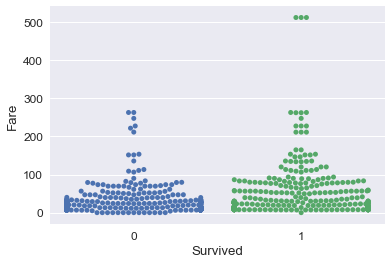

In [20]:
sns.swarmplot(x="Survived", y="Fare", data=titanic_data)

If we use a swarmplot, we may even get better insights on ticket data.

In [31]:
### Separating survivors by sex

male_survivors = []
female_survivors = []
for passenger in survivor_data:
    if passenger['Sex'] == 'male':
        male_survivors.append(passenger)
    elif passenger['Sex'] == 'female':
        female_survivors.append(passenger)

describe_data(list_data(female_survivors, 'Age'),20, 'hist')
plt.show()


NameError: name 'survivor_data' is not defined

In [32]:
### Separating survivors by sex

male_survivors = []
female_survivors = []
for passenger in survivor_data:
    if passenger['Sex'] == 'male':
        male_survivors.append(passenger)
    elif passenger['Sex'] == 'female':
        female_survivors.append(passenger)

describe_data(list_data(female_survivors, 'Age'),28, 'hist')
plt.show()

NameError: name 'survivor_data' is not defined

NameError: name 'list_data' is not defined

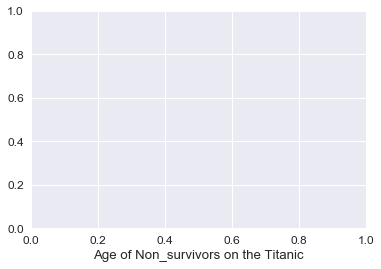

In [33]:
##NON_SURVIVOR DATA BY AGE

sns.set(style='darkgrid',font='sans-serif',font_scale=1.2)
plt.xlabel('Age of Non_survivors on the Titanic')
non_survivor_age_list = list_data(non_survivor_data,'Age')
describe_data(non_survivor_age_list, 28, 'hist')

There are 93 male passengers compared to 197 female passengers

Size:  93
Mean:  27.2760215054
Standard Deviation:  16.4158276718
Median:  28.0
Minimum:  0.42
Maximum:  80.0


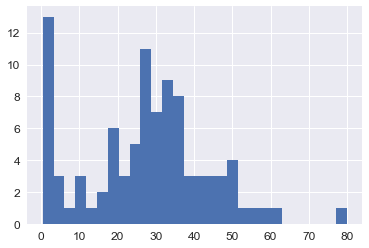

In [19]:
##DESCRPTION OF MALE SURVIVORS

describe_data(list_data(male_survivors, 'Age'),28,'hist')

<Container object of 8 artists>

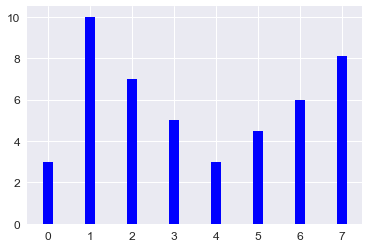

In [20]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
width = 0.25
plt.bar(x, y, width, color="blue")

## Exploring other relationships that affect Survivability

### Categorizing Data Into Groups

AGE AND FARE BY SEX

In [24]:
##RELATIONSHIP BETWEEN FARE AND AGE IN SURVIVORS

survivor_fare = object_list(survivor_data, 'Age', 'Fare', None)
survivor_siblings = object_list(survivor_data, 'Age', 'SibSp', None)

scaled_sibling = scale_by_factor(survivor_siblings, 50)
    
scatter(survivor_age_list,survivor_fare, s= scaled_sibling)

NameError: name 'object_list' is not defined

Size:  342
Mean:  48.3954076023
Standard Deviation:  66.4995628092
Median:  26.0
Minimum:  0.0
Maximum:  512.3292


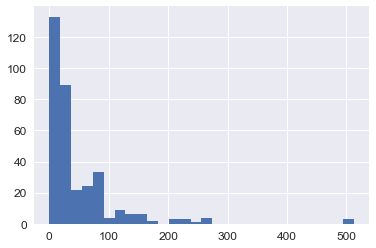

In [25]:
survivor_fare_list = list_data(survivor_data,'Fare')
describe_data(survivor_fare_list, 28,'hist')

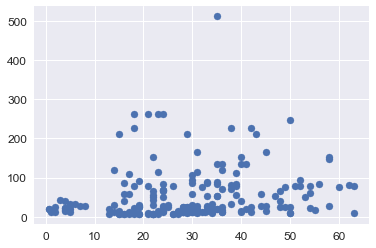

In [66]:
##RELATIONSHIP BETWEEN FARE AND AGE IN WOMEN


female_survivor_fare = object_list(female_survivors, 'Age', 'Fare', None)
scatter(list_data(female_survivors, 'Age'),female_survivor_fare)
plt.show()

In [63]:
for passenger in data:
    if passenger['Sex'] == 'male':
        males.append(passenger)
        if passenger['Age'] > 21 and passenger['Age'] < 50:
            man.append(passenger)
        else:
        females.append(passenger)
            if passenger['Age'] > 21 and passenger['Age'] < 50:
            woman.append(passenger)
    if passenger['Age'] <= 12:
        child.append(passenger)
    elif passenger['Age'] >= 13 and passenger['Age'] < 21:
        adolescent.append(passenger)
    elif passenger['Age'] >= 21 and passenger['Age'] < 60:
        adolescent.append(passenger)
 
len(list(survivor_data))
len(list(non_survivor_data))
len(list_data(female_survivors))
len(list_data(male_survivors))

help(sns.plot)

SyntaxError: invalid syntax (<ipython-input-63-a74386e37563>, line 16)

In [74]:
titanic_names = titanic_data
titanic_by_name = defaultdict(list)
family = defaultdict(list)
for passenger in titanic_names:
    passenger['First Name'] = (passenger['Name']).split(',')[0] 
    key = passenger['SibSp']
    key2 = passenger['Ticket']  
    key3 = passenger['First Name'] + ' ' + str(key + 1) + ' ' + key2
    for i in range(1,9):
        if key == i:
            titanic_by_name[key3].append(passenger)

In [86]:
titanic_by_ticket = defaultdict(list)
for passenger in titanic_names:
    if passenger['Embarked'] == 'S':
        key = passenger['Ticket']
        titanic_by_ticket[key].append(passenger)
    
titanic_by_ticket['CA. 2343']

[OrderedDict([('PassengerId', '160'),
              ('Survived', '0'),
              ('Pclass', '3'),
              ('Name', 'Sage, Master. Thomas Henry'),
              ('Sex', 'male'),
              ('Age', None),
              ('SibSp', 8),
              ('Parch', 2),
              ('Ticket', 'CA. 2343'),
              ('Fare', 69.55),
              ('Cabin', None),
              ('Embarked', 'S'),
              ('Sur', 69.55),
              ('First Name', 'Sage')]),
 OrderedDict([('PassengerId', '181'),
              ('Survived', '0'),
              ('Pclass', '3'),
              ('Name', 'Sage, Miss. Constance Gladys'),
              ('Sex', 'female'),
              ('Age', None),
              ('SibSp', 8),
              ('Parch', 2),
              ('Ticket', 'CA. 2343'),
              ('Fare', 69.55),
              ('Cabin', None),
              ('Embarked', 'S'),
              ('Sur', 69.55),
              ('First Name', 'Sage')]),
 OrderedDict([('PassengerId', '202'),
        

In [90]:
sum_grouped_items(titanic_by_name)
sum_grouped_items(titanic_by_ticket)

{'110152': 3,
 '110413': 3,
 '110465': 2,
 '110564': 1,
 '111240': 1,
 '111320': 1,
 '111427': 1,
 '111428': 1,
 '112050': 1,
 '112052': 1,
 '112053': 1,
 '112058': 1,
 '112059': 1,
 '113028': 1,
 '113043': 1,
 '113050': 1,
 '113055': 1,
 '113056': 1,
 '113059': 1,
 '113501': 1,
 '113505': 2,
 '113510': 1,
 '113514': 1,
 '113760': 4,
 '113767': 1,
 '113773': 1,
 '113776': 2,
 '113781': 4,
 '113783': 1,
 '113784': 1,
 '113786': 1,
 '113787': 1,
 '113788': 1,
 '113789': 2,
 '113792': 1,
 '113794': 1,
 '113796': 1,
 '113798': 1,
 '113800': 1,
 '113803': 2,
 '113804': 1,
 '113806': 2,
 '113807': 1,
 '11668': 2,
 '11751': 2,
 '11752': 1,
 '11753': 1,
 '11769': 1,
 '12233': 1,
 '12749': 2,
 '13502': 3,
 '13507': 2,
 '13509': 1,
 '14973': 1,
 '1601': 7,
 '16988': 1,
 '17463': 1,
 '17464': 1,
 '17465': 1,
 '17466': 1,
 '17474': 2,
 '19877': 2,
 '19943': 2,
 '19947': 1,
 '19950': 4,
 '19952': 1,
 '19972': 1,
 '19988': 1,
 '19996': 2,
 '2003': 1,
 '211536': 1,
 '21440': 1,
 '218629': 1,
 '220367

In [43]:
married = []
for person in titanic_data:
    if person['Cabin'] == 'B78':
        print(person)

OrderedDict([('PassengerId', '32'), ('Survived', '1'), ('Pclass', '1'), ('Name', 'Spencer, Mrs. William Augustus (Marie Eugenie)'), ('Sex', 'female'), ('Age', None), ('SibSp', 1), ('Parch', 0), ('Ticket', 'PC 17569'), ('Fare', 146.5208), ('Cabin', 'B78'), ('Embarked', 'C'), ('Sur', 146.5208), ('First Name', 'Spencer')])


In [32]:
married = []
for person in titanic_data:
    if person['Sex'] == 'female':
        if 'Mrs' in person['Name']:
            married.append(person)
            
married

ModuleNotFoundError: No module named 'plotly'

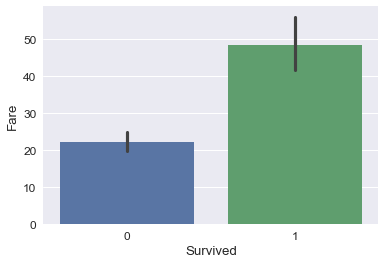

In [13]:
sns.boxplot(x="Survived", y="Fare", data=titanic_data)

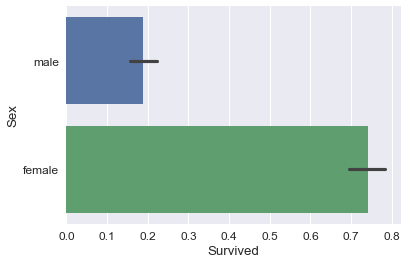

In [19]:
sns.barplot(x="Survived", y="Sex", data=titanic_data)

##### The cozy thing to note here is that those that paid fairly outragous amounts on Fares seemed to have survived the sinking of the titanic

# Some Observations

### The Tragedy Of The Titanic

While investigating survivability against the number of Sibling Spouses('SibSp'), I ran into a peculair phenomenon.

It seemed that people with SibSp=8 seemed to fair terrribly badly. 


What's even more peculiar is that these people were missing also missing all Age data and Cabin Data which might have made them candidates for Data removal in some analysis. 

Further investigation led to the conclusion that these individuals were actually one family. It turns out that they share the same first name (as well as family name). 'Sage' 

More effort to discover more about this family and their circumstances however was limited by the amount of data.

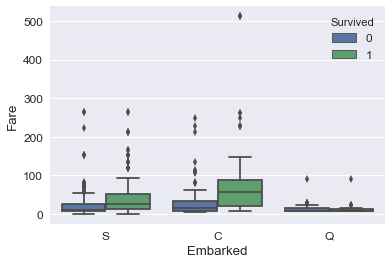

In [40]:
sns.boxplot(x="Embarked", y="Fare", hue="Survived",data=titanic_data);

In [41]:
titanic_df[titanic_df['Family Name'] == 'Sage']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Name,Family Key
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,SageCA. 2343
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,SageCA. 2343
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,SageCA. 2343
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,SageCA. 2343
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,SageCA. 2343
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,SageCA. 2343
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,SageCA. 2343


In [370]:
#titanic_df[titanic_df['Family Name'] == 'Sage']

class_s = titanic_df[titanic_df['Embarked'] == 'S']
class_s_3 = class_s[class_s['Pclass'] == 3]


#titanic_df[titanic_df['Ticket'] == 'CA. 2343']

mother = class_s_3[class_s_3['Parch'] == 2]

mother[mother['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Name,Family Key
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Johnson347742
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson,Andersson3101281
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,Goodwin,GoodwinCA 2144
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson,Andersson347082
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S,Ford,FordW./C. 6608
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,SageCA. 2343
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S,Kink-Heilmann,Kink-Heilmann315153
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,Asplund,Asplund347077
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,Rosblom,Rosblom370129
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Sandstrom,SandstromPP 9549
